## Visualization using MatPlotLib & Seaborn

Visualizing data is an important part of analytics.  The different graph types enable you to understand your data by seeing its characteristics (shape, outliers, descriptives).  

We will cover a few visualization models.  At the same time, when trying to understand a dataset, I encourage you to use visualizations extensively _before_ moving on to any kind of numerical analysis.  Visualization is an important part of _swimming in your data_--that is, deeply understanding your data.  Swimming is very important, since it helps you understand what you need to do _before_ you dive in.  Visualization is a critical part of that process.

In this notebook, we will cover the following visualization techniques:
* histograms
* scatterplots
* boxplots
* violinplots

I will demonstrate how to create histograms using Matplotlib (which is probably the most commonly used visualization package) and Seaborn.  Seaborn is a higher resolution library that can create professional images.  It is incredibly powerful.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# important: ensures the visualizations will be in the Notebook
%matplotlib inline 

The **Old Newark** dataset contains all the houses in the area west of College Ave, which is known as "Old Newark". This information was gathered from Zillow.com, which we will use extensively in the next few weeks.

In [4]:
import pandas as pd
df = pd.read_csv('OldNewark.csv')
df.head()

,ID,STREETNO,STREET,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
0,150,504,Apple,244069,1960,3,2.0,1400,0.36,NaN,NaN
1,151,602,Apple,259061,1963,3,2.0,1950,0.29,250000.0,2006.0
2,23,120,Townsend,303508,1800,3,3.0,1903,0.35,183000.0,1997.0
3,95,56,Sunset,307445,2186,4,3.0,1915,0.26,532000.0,2007.0
4,99,45,Sunset,297546,1625,3,1.5,1915,0.27,NaN,NaN


In [5]:
df1=df.copy()

In [6]:
df1.shape

(166, 11)

In [7]:
df1.columns

Index(['ID', 'STREETNO', 'STREET', 'ZESTIMATE', 'SQFT', 'BEDR', 'BATHR',
       'YRBUILT', 'LOTSIZE', 'SOLDFOR', 'YRSOLD'],
      dtype='object')

Remember: rows, columns...So we have 166 rows (houses) and 11 columns. Let's explore the descriptives 

In [8]:
df1['STREET'].value_counts() # verify the streets

Apple       44
Beverly     33
Sunset      23
Winslow     22
Orchard     19
Townsend    11
Indian       8
Grantham     6
Name: STREET, dtype: int64

In [9]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,166.0,83.500000,48.064193,1.00,42.2500,83.500,124.75,166.00
STREETNO,166.0,248.204819,163.428996,15.00,121.7500,230.000,378.00,611.00
ZESTIMATE,166.0,307347.054217,66620.775343,196710.00,268143.2500,298821.000,340988.00,613238.00
SQFT,166.0,2174.728916,682.799979,1050.00,1750.0000,2125.000,2518.75,5427.00
BEDR,166.0,3.512048,0.744580,1.00,3.0000,3.000,4.00,6.00
BATHR,166.0,2.328313,0.848731,1.00,2.0000,2.000,2.50,6.50
YRBUILT,166.0,1951.319277,45.388697,1400.00,1949.0000,1957.000,1961.00,2004.00
LOTSIZE,166.0,0.335301,0.087044,0.17,0.2725,0.315,0.37,0.68
SOLDFOR,122.0,260441.180328,128707.344343,12000.00,172850.0000,258125.000,340000.00,600000.00
YRSOLD,122.0,2004.950820,12.306588,1971.00,1999.2500,2006.500,2016.00,2019.00


Examine the above data carefully.  Do the values make sense?  

In [10]:
# 1400 in the YEARBUILT columns is a typo. We drop that row.

df1.drop(df1.loc[df1['YRBUILT'] == 1400].index,inplace=True)

The alternative approach for dropping that row is to use the following code code:

* df1 = df1[df1['YRBUILT'] != 1400]

or

* df1 = df1. loc[df1['YRBUILT'] != 1400]

In [11]:
# to check that the minimum value (1400) is dropped
df1['YRBUILT'].min()

1903

In [12]:
# How many missing values do we have?
df1.isnull().sum()

ID            0
STREETNO      0
STREET        0
ZESTIMATE     0
SQFT          0
BEDR          0
BATHR         0
YRBUILT       0
LOTSIZE       0
SOLDFOR      43
YRSOLD       43
dtype: int64

Makes sense. We know the addresses and physical characteristics for all the houses, but some may have been sold decades ago, so we dont have the records for the older houses.  This means that the average prices will favor the houses that were sold more recently.  Older houses wont be included in the descriptives.  

Note how important that seemingly minor fact is, when interpreting our data!

## Correlations

In [13]:
# if it gives warning, you can try this code: corr=df1.corr(numeric_only=True)

corr=df1.corr()
corr

,ID,STREETNO,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
ID,1.000000,0.331985,-0.440066,-0.206522,0.002688,-0.277833,0.433043,-0.250420,-0.377508,-0.084401
STREETNO,0.331985,1.000000,-0.418195,-0.237044,-0.028627,-0.260636,0.207126,-0.160439,-0.130535,0.102945
ZESTIMATE,-0.440066,-0.418195,1.000000,0.733121,0.361529,0.707010,-0.190832,0.342678,0.497601,0.047970
SQFT,-0.206522,-0.237044,0.733121,1.000000,0.402993,0.657264,0.070871,0.279625,0.280854,-0.069698
BEDR,0.002688,-0.028627,0.361529,0.402993,1.000000,0.494114,0.011250,0.137894,0.175498,-0.042371
BATHR,-0.277833,-0.260636,0.707010,0.657264,0.494114,1.000000,-0.077494,0.252789,0.286011,-0.056447
YRBUILT,0.433043,0.207126,-0.190832,0.070871,0.011250,-0.077494,1.000000,-0.047174,-0.399611,-0.154098
LOTSIZE,-0.250420,-0.160439,0.342678,0.279625,0.137894,0.252789,-0.047174,1.000000,0.132217,0.003346
SOLDFOR,-0.377508,-0.130535,0.497601,0.280854,0.175498,0.286011,-0.399611,0.132217,1.000000,0.635992
YRSOLD,-0.084401,0.102945,0.047970,-0.069698,-0.042371,-0.056447,-0.154098,0.003346,0.635992,1.000000


## Histograms

Before doing any analysis, it is vital that you understand your data.  I call it "swimming in your data", to evoke the idea that you need to understand everything you can before you jump into any statistical analysis.  

Histogram is similar to a Bar Chart, but a histogram groups numbers into ranges . The height of each bar shows how many fall into each range. Histograms are a quick way to understand the distribution of your data.  

***Histogram with matplotlib***

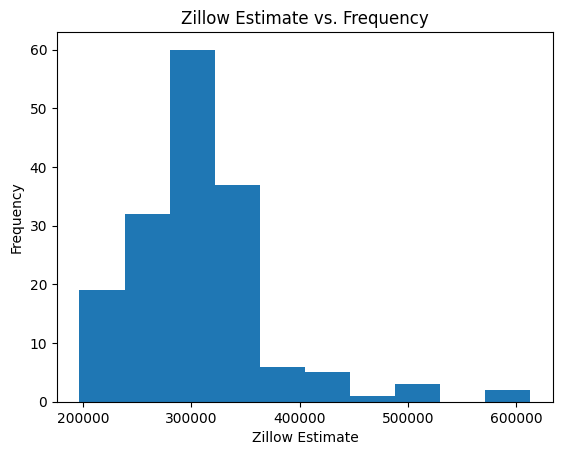

In [14]:
plt.title('Zillow Estimate vs. Frequency')
plt.xlabel('Zillow Estimate')
plt.ylabel('Frequency')
plt.hist(df1['ZESTIMATE']) # we can use dot notation instead of bracket notation
plt.show()

***Histogram with seaborn***

In seaborn, we use a different approach:

Text(0, 0.5, 'Frequency')

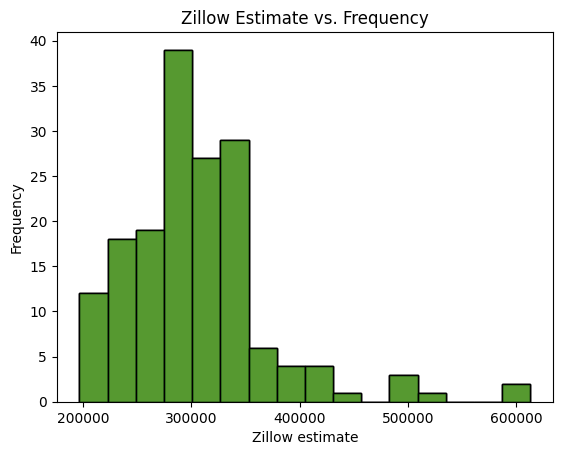

In [15]:
sns.histplot(df1['ZESTIMATE']).set(title='Zillow Estimate vs. Frequency', xlabel='Zillow estimate', ylabel='Frequency')

# Or you can type the code in three rows like the following
#sns.histplot(df1['ZESTIMATE']).set_title('Zillow Estimate vs. Frequency') # you can use displot instead of histplot as well
#sns.histplot(df1['ZESTIMATE']).set_xlabel('Zillow estimate')
#sns.histplot(df1['ZESTIMATE']).set_ylabel('Frequency')

### EXERCISE 1

* Create a histogram of SOLDFOR using matplotlib (add title, x lable and y label)

* Create a histogram of SOLDFOR using seaborn (add title, x lable and y label)

## Scatterplots

Scatterplots allow you to see how two variables are related to each other.  As example, look at the following plot, which examines the relationship between square feet and the ZEstimate, which is Zillow's estimate of a home's value:

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

***Scatterplot with Matplotlib***

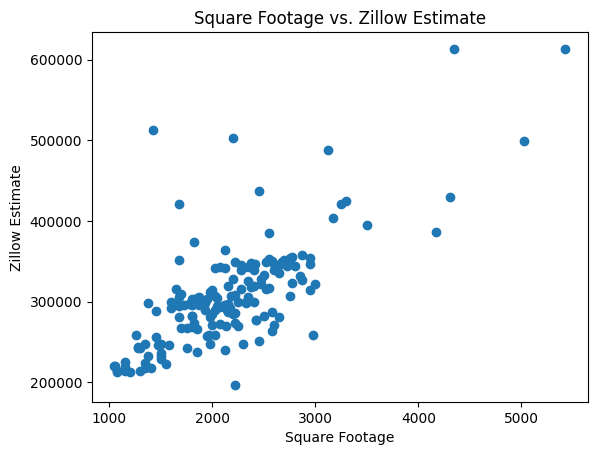

In [16]:
plt.title('Square Footage vs. Zillow Estimate')
plt.xlabel('Square Footage')
plt.ylabel('Zillow Estimate')
plt.scatter(df1['SQFT'], df1['ZESTIMATE']) # x first, then y
plt.show()

***Scatterplot with Seaborn***

Text(0.5, 1.0, 'Square Footage vs. Zillow Estimate')

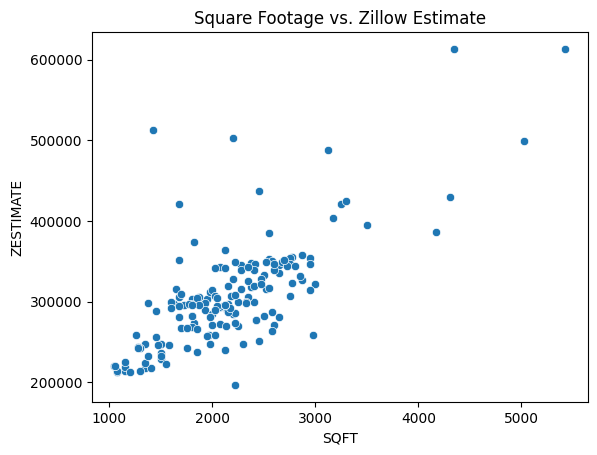

In [17]:
# you can use this as well: sns.scatterplot(x='SQFT', y='ZESTIMATE', data=df1).set_title('Square Footage vs. Zillow Estimate')

sns.scatterplot(x=df1['SQFT'], y=df1['ZESTIMATE']).set_title('Square Footage vs. Zillow Estimate')

### EXERCISE 2

* Creat a scatter plot of ZESTIMATE vs. SOLDFOR using matplotlib (add title, x lable and y label)

* Creat a scatter plot of ZESTIMATE vs. SOLDFOR using seaborn (add title)

**Scatterplot with regression line**

To double-check the strength of this relationship betwen 'SQFT' and 'ZESTIMATE', you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

Text(0.5, 1.0, 'SQFT vs. ZESTIMATE')

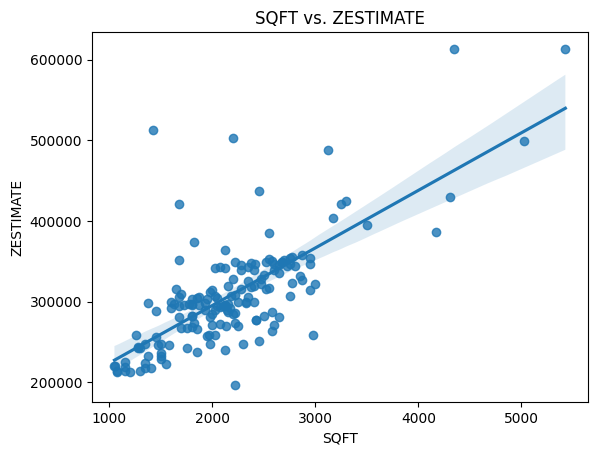

In [18]:
#you can use this code as well: sns.regplot(x="SQFT", y="ZESTIMATE", data=df1).set_title('SQFT vs. ZESTIMATE')

sns.regplot(x=df1['SQFT'], y=df1['ZESTIMATE']).set_title('SQFT vs. ZESTIMATE')


What if we want to see how the different streets fall on the plot?  

***Scatterplot Colored by STREET with Seaborn***

<AxesSubplot: xlabel='SQFT', ylabel='ZESTIMATE'>

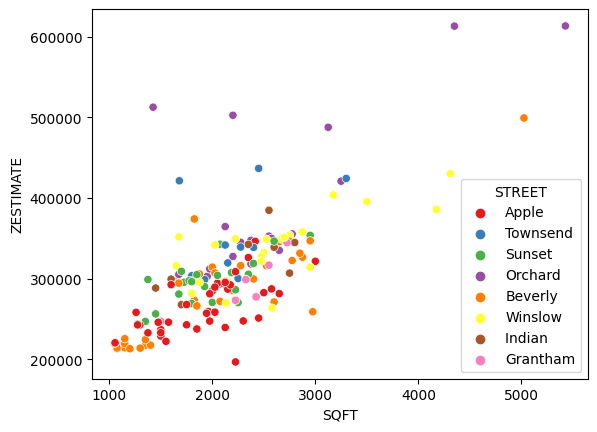

In [92]:
# you can use this code as well: sns.scatterplot(x="SQFT", y="ZESTIMATE", hue="STREET", data=df1, palette='Set1')
# In seaborn, the hue parameter represents which column in the data frame, you want to use for color encoding.
# Set1 is a palette name
# you can check this website for palette names: https://seaborn.pydata.org/tutorial/color_palettes.html
# we can pick colors : palette=['green','purple','brown', 'red', 'blue', 'yellow', 'orange', 'black']


sns.scatterplot(x=df1['SQFT'], y=df1['ZESTIMATE'], hue=df1['STREET'],palette='Set1')

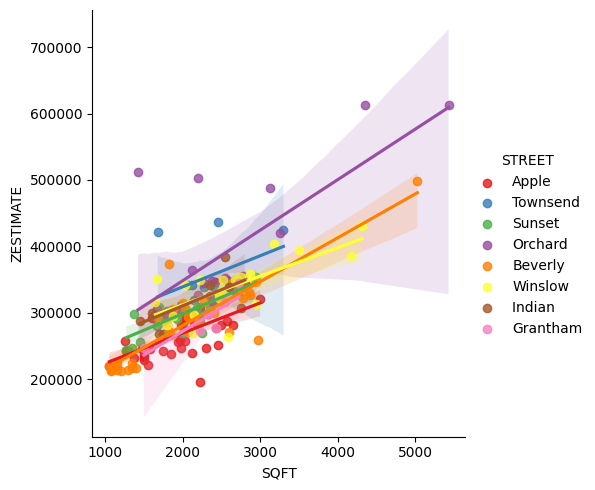

In [93]:
# to add regression line

sns.lmplot(x='SQFT', y='ZESTIMATE', hue='STREET',palette='Set1', data=df1)


In [94]:
df1.columns

Index(['ID', 'STREETNO', 'STREET', 'ZESTIMATE', 'SQFT', 'BEDR', 'BATHR',
       'YRBUILT', 'LOTSIZE', 'SOLDFOR', 'YRSOLD'],
      dtype='object')

### EXERCISE 3

Create scatterplot of YRBUILT vs. SOLDFOR (change the color of dots by BEDR) and add title

## Pairplot

Seaborn also includes a pairplot method, which generates scatterplots of all variables, pairwise. For example:

***paiplot with seaborn***

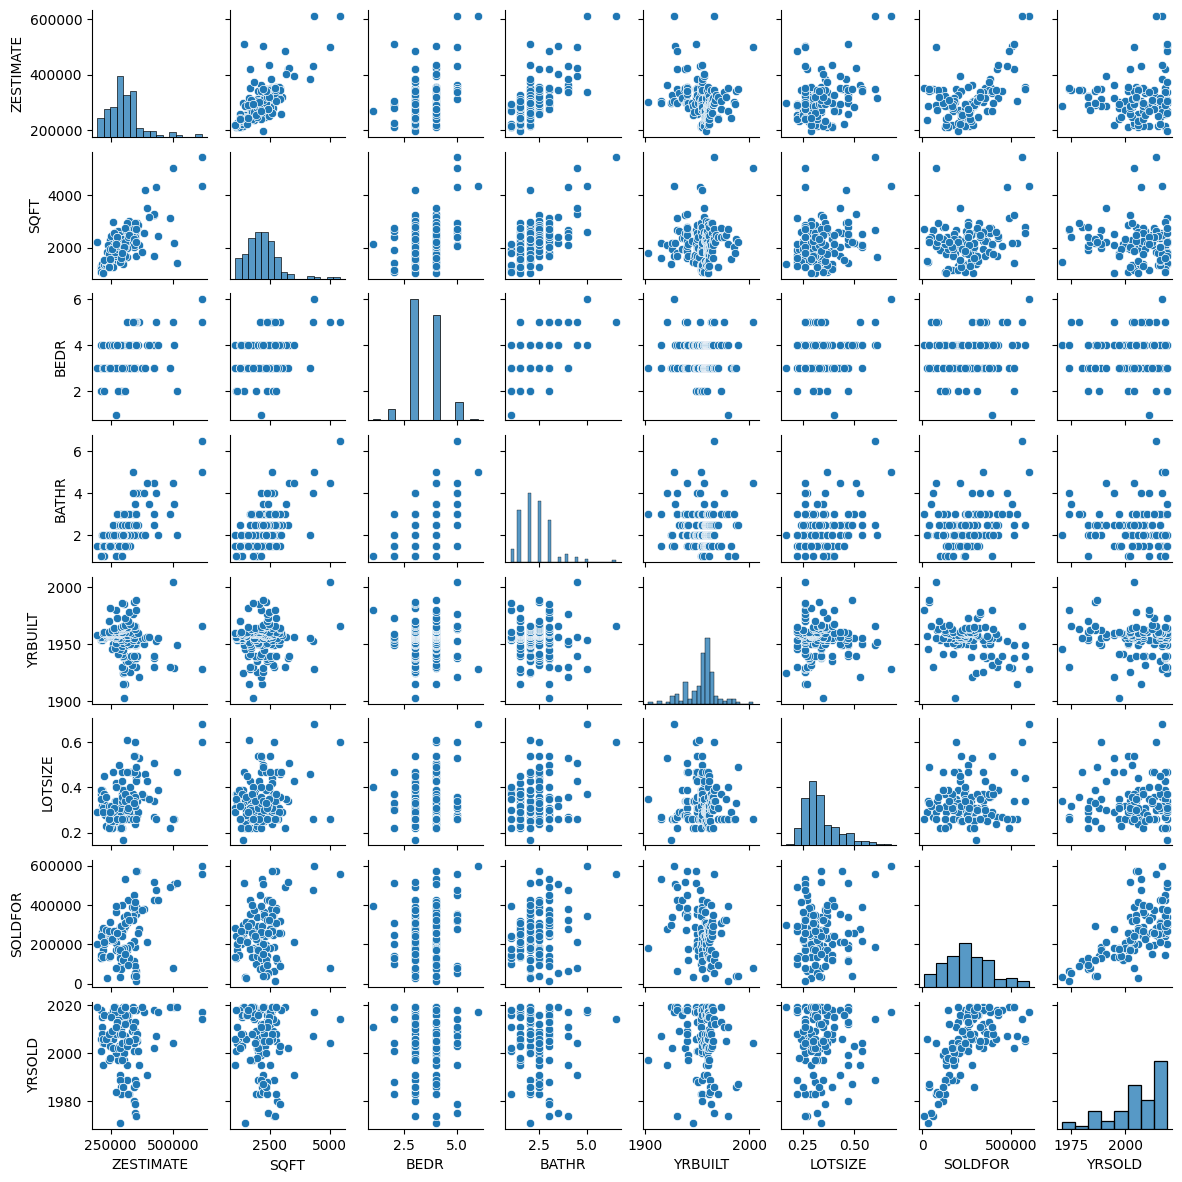

In [96]:

sns.pairplot(df1[['ZESTIMATE', 'SQFT', 'BEDR', 'BATHR','YRBUILT', 'LOTSIZE', 'SOLDFOR', 'YRSOLD']], height=1.5)

Examine the above plots carefully.  The diagonals are histograms, while the off-diagonals are scatterplots.  Notice anything interesting?

## Correlation Matrix

Although not a visualization technique per se, correlation matrices quantify the linear relationship between two variables.  A positive relationship (e.g., Zestimate and square footage) means that as one increases, so does the other.A negative relationship indicaates that as one increases, the other _decreases_.  A correlation of 1 indicates a perfect line with a positive slope.  A correlation of 0 means there is no linear relationship.  Values between 0 and 1 indicate the degree of linearity.

Take a look at the following correlation matrix.  I have added some shading which allows you to see the strength of the correlations.  Note this approach darkens only positive correlations: make sure to examine the negative ones as well.  Note the strongest, and see if they make sense.

In [97]:
temp1=df1[['SQFT','ZESTIMATE']].copy()
corr = temp1.corr()
corr.style.background_gradient() # add shading

,SQFT,ZESTIMATE
SQFT,1.000000,0.733121
ZESTIMATE,0.733121,1.000000


How high does a correlation have to be to be considered "strong"?  Let's generate some data to explore the question:

In [98]:
# Let's create some simulated data
# assume houses are priced $150 per sqft. 
# Lots sell for $50,000

temp1['price_est'] = 50000 + 150 * temp1['SQFT'] # perfect linear relationship!

This is in the form of a linear relationship:
* 50000 is the y-intercept
* 150 is the slope. df2['SQFT'] is the independent variable, or x
* the price estimate is the dependent variable, or y

In [99]:
temp1[['SQFT','price_est']].head()

,SQFT,price_est
1,1963,344450
2,1800,320000
3,2186,377900
4,1625,293750
5,2125,368750


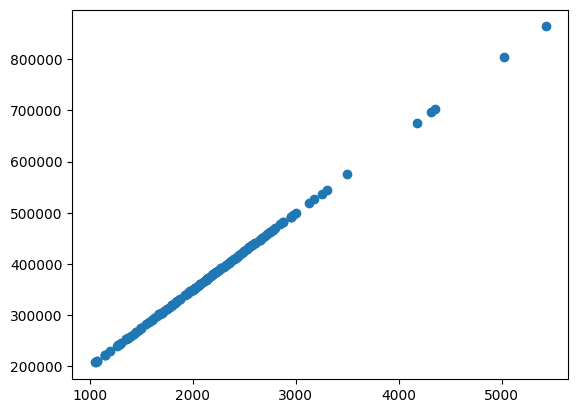

In [100]:
plt.scatter(temp1['SQFT'], temp1['price_est'])
plt.show()

The scatterplot confirms the above statement, since the points all fall directly on the line

In [101]:
temp2 = temp1[['SQFT','price_est']].copy()
corr = temp2.corr()
corr.style.background_gradient()

,SQFT,price_est
SQFT,1.000000,1.000000
price_est,1.000000,1.000000


Perfect line: not surprising, given how price_est was determined!

## Boxplots
A boxplot is another exploratory visualization technique that can provide significant amounts of information on the data in your dataframe.  Understanding them is critical, however!

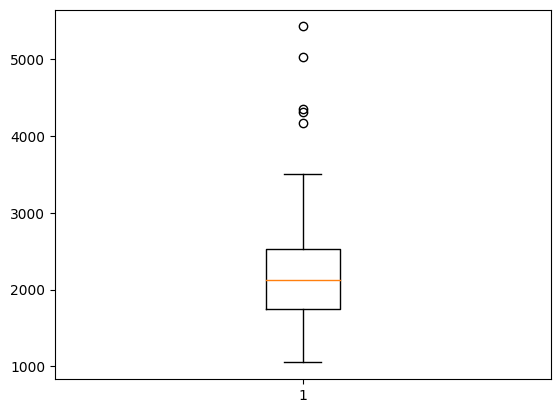

In [102]:
plt.boxplot(df1['SQFT'])
plt.show()

<AxesSubplot: ylabel='SQFT'>

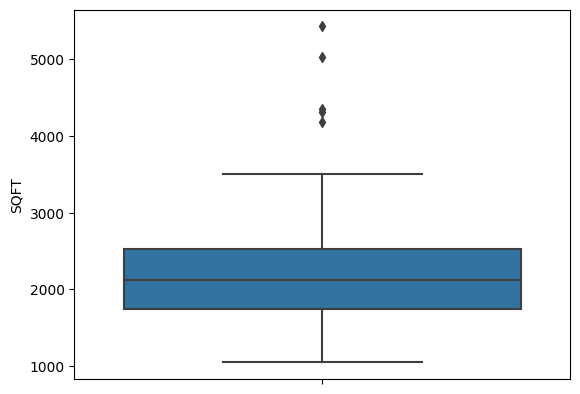

In [103]:
sns.boxplot(y=df1['SQFT'])

### Interpreting the Boxplot
The "box" part of the boxplot represents the interquartile range--that is, the middle 50% of the data.  The red line in the middle of the box represents the median value. The whiskers represent the highest and lowest 25%.  The  small circles are interpreted as outliers--that is, anything that is 1.5 standard deviations beyond the interquartile range.

### Violin Plots
Boxplots are incredibly useful, but violin plots take them to the next level.  A violin plot is very similar, but includes a graphical representation of the distribution.

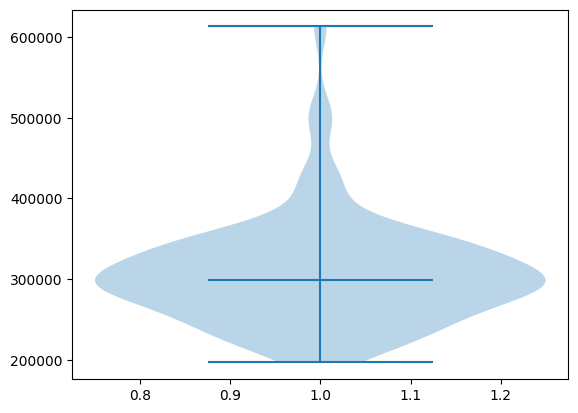

In [104]:
plt.violinplot(df1['ZESTIMATE'], showmedians=True)
plt.show()

<AxesSubplot: ylabel='ZESTIMATE'>

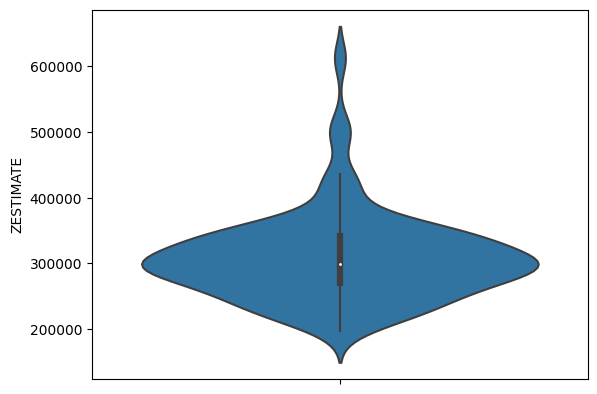

In [105]:
sns.violinplot(y=df1['ZESTIMATE'])